# ⭐️ What is the Most Popular Star Wars Movie?

<div align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Star_Wars_Logo.svg" width="300"/>
</div>

<p align="center">✨ May the Force be with you! ✨</p>

---

## 🗂️ Table of Contents
1. 📝 Introduction
2. 📊 Data Collection
3. 🔍 Data Exploration
    - 👀 Initial Observations
    - 🧾 Samples
    - 🔑 Unique Values
4. 🛠️ Data Preprocessing
    - ✔️ Yes or No Columns
    - 🎬 One-hot encoding columns
    - 🏆 Ranking Columns
5. 📈 Data Analysis
    - Finding the Highest-Ranked Movie
    - Finding the Most Viewed Movie
    - Exploring the Data by Binary Segments
    - Binary Segment Analysis: Star Wars Fans vs. Non-Fans

---

## 📝 Introduction

This notebook is an analysis of the Star Wars survey to find out the most popular Star Wars movie. We will explore the data, clean it, and use it to answer our main question: which Star Wars film is the fan favorite?

## 📊 Data Collection

The data comes from a survey of Star Wars fans conducted using SurveyMonkey. There were 835 responses in total, and the results were uploaded to a [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

When loading the data, we use a special encoding (ISO-8859-1) because the dataset contains some characters that aren't supported by Python's default encoding.

## 🔍 Data Exploration

### 👀 Initial Observations

Before diving into detailed analysis, we will first explore the **general information** of the dataset to understand its **structure** and identify any initial issues or patterns. This will help guide our **data cleaning** and **preparation** steps.

In [588]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import sys
import os

In [589]:
# load the dataset
df = pd.read_csv('starWars.csv', encoding='ISO-8859-1') # ISO-8859-1 encoding to handle special characters

In [590]:
# print the general information of the dataset
print('*' * 100)
print('The information of the dataset is as follows:')
print(df.info())

****************************************************************************************************
The information of the dataset is as follows:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1187 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars

---

At first glance, we notice the following about the dataset:
- There are **38 features** — we need to **normalize** them.
- Some features are **unnamed** — we should determine what these columns **represent**.
- Except for the response ID (a float), all other columns are **strings** - the format is consistent.
- Several columns contain **many null values** - the significant **data preprocessing** will be needed.

Overall, this dataset will require substantial cleaning.  
The next step of the plan is to simplify the dataset for easier analysis:
1. We can make the data a bit easier to analyze by converting 'yes or no' column to a **Boolean**.
2. Investigate unnamed columns, as some may be **one-hot encoded** or represent **rankings**.

---

### 🧾 Samples

From our initial observations, it’s clear that the dataset has a **complex structure** and will require **cleaning** and **restructuring**.

After gaining a general understanding of the dataset’s structure, we can now look at some sample entries.

In [591]:
# see some examples of the dataset
df.head()


,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


---

From the samples above, it is clear that this dataset requires significant cleaning. **It contains a mix of multiple-choice answers, yes-or-no responses, and one-hot encoded columns.**

---

### 🔑 Unique Values

From the sample rows, we can see that some columns are simple **yes-or-no questions**, some are **one-hot encoded** columns, and others are **multiple choice**. To simplify the dataset, we will ignore the one-hot encoded columns and **focus on exploring the unique values** in each of the remaining columns.

In [592]:
# display the unique answers of each column
print('*' * 100)

# category the columns
one_hot_encoding_columns = ["Which of the following Star Wars films have you seen? Please select all that apply.",
                           "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.",
                           "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her."]

# loop through all the columns and then print the unique vallues
for col in df.columns:
    if not col.startswith('Unnamed') and col not in one_hot_encoding_columns:
        print(f"Unique values in '{col}':")
        print(df[col].unique())
        print('*' * 100)

****************************************************************************************************
Unique values in 'RespondentID':
[           nan 3.29288000e+09 3.29287954e+09 ... 3.28837529e+09
 3.28837307e+09 3.28837292e+09]
****************************************************************************************************
Unique values in 'Have you seen any of the 6 films in the Star Wars franchise?':
['Response' 'Yes' 'No']
****************************************************************************************************
Unique values in 'Do you consider yourself to be a fan of the Star Wars film franchise?':
['Response' 'Yes' nan 'No']
****************************************************************************************************
Unique values in 'Which character shot first?':
['Response' "I don't understand this question" nan 'Greedo' 'Han']
****************************************************************************************************
Unique values in 'Are you f

---

**From the unique values, we can see that there are basically two types of columns: "yes or no" and "multiple choice".**

**Yes or no columns:**
- Have you seen any of the 6 films in the Star Wars franchise?
- Do you consider yourself to be a fan of the Star Wars film franchise?
- Are you familiar with the Expanded Universe?
- Do you consider yourself to be a fan of the Expanded Universe?
- Do you consider yourself to be a fan of the Star Trek franchise?

**Multiple choice columns:**
- Gender — the respondent's gender
- Age — the respondent's age group
- Household Income — the respondent's income bracket
- Education — the respondent's education level
- Location — the respondent's census region

---

## 🛠️ Data Cleaning & Preprocessing

### ✔️ Yes or No Columns

Currently, the yes-or-no columns use string values (**"Yes"** and **"No"**). To simplify analysis, we will convert these columns to boolean values: **True**, **False**. Using booleans makes it easier to **filter** and **analyze** the data without relying on string comparisons.

We will use the pandas map() method to perform this conversion.

In [593]:
# convert the yes or no answers to boolean values
conversion_map = {
    "Yes": True,
    "No": False,
}

# group the yes or no columns
conversion_columns = [
"Have you seen any of the 6 films in the Star Wars franchise?",
"Do you consider yourself to be a fan of the Star Wars film franchise?",
"Are you familiar with the Expanded Universe?",
"Do you consider yourself to be a fan of the Expanded Universe?æ",
"Do you consider yourself to be a fan of the Star Trek franchise?"]

# convert the columns to boolean values
for col in conversion_columns:
    df[col] = df[col].map(conversion_map)


In [594]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,NaN,NaN,NaN,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


---

The table above **confirms** that the original "Yes" and "No" string values have been **successfully** converted to boolean values: True and False.

---

### 🎬 One-hot encoding columns

There are several columns represent **a single checkbox question**. The respondent checked off a series of boxes in response to the question, 

For example:

- **Which of the following Star Wars films have you seen? Please select all that apply.**
— Indicates whether the respondent has seen **Star Wars: Episode I – The Phantom Menace**.
- **Unnamed: 4** — Indicates whether the respondent has seen **Star Wars: Episode II – Attack of the Clones**.
- **Unnamed: 5** — Indicates whether the respondent has seen **Star Wars: Episode III – Revenge of the Sith**.
- **Unnamed: 6** — Indicates whether the respondent has seen **Star Wars: Episode IV – A New Hope**.
- **Unnamed: 7** — Indicates whether the respondent has seen **Star Wars: Episode V – The Empire Strikes Back**.
- **Unnamed: 8** — Indicates whether the respondent has seen **Star Wars: Episode VI – Return of the Jedi**.

For each of these columns, if a cell contains the movie title, it indicates the respondent has **seen** that movie.

We should convert these columns to **boolean values** and give them more descriptive names. Similar to our previous approach, we’ll map the **movie title** to **True** and **NaN** to **False** in each column.

In [595]:
# convert the 'Unnamed' columns to boolean values
for col in df.columns[3:9]:
    df[col] = df[col].notna()

In [596]:
df.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?æ,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,NaN,NaN,True,True,True,True,True,True,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,NaN,NaN,NaN,Response,Response,Response,Response,Response
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,False,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,False,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Next, we'll need to rename the columns to reflect what they represent. We can use pandas rename() method to do this. 

In [597]:
df = df.rename(columns={
    "Which of the following Star Wars films have you seen? Please select all that apply.": "Seen_1",
    "Unnamed: 4": "Seen_2",
    "Unnamed: 5": "Seen_3",
    "Unnamed: 6": "Seen_4",
    "Unnamed: 7": "Seen_5",
    "Unnamed: 8": "Seen_6"})

In [598]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                         --------------  -----  
 0   RespondentID                                                                                                                                   1186 non-null   float64
 1   Have you seen any of the 6 films in the Star Wars franchise?                                                                                   1186 non-null   object 
 2   Do you consider yourself to be a fan of the Star Wars film franchise?                                                                          836 non-null    object 
 3   Seen_1                      

---

After converting the one-hot encoding columns to **boolean values** and giving them **clear names**, the dataset is now much easier to work with. This step helps us quickly see which movies each respondent has seen and sets us up for more straightforward analysis in the next sections.

---

### 🏆 Ranking Columns

Next, we will try to clean the ranking columns. 

The next six columns ask the respondent to **rank** the Star War movies in order **from least to most favorite**. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the follwing columns can contain the value 1, 2, 3, 4, 5, 6, or NaN.

- **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace
- **Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones
- **Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith
- **Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope
- **Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
- **Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi


Fortunately, these columns don't require much cleaning. We'll need to convert each column to a numeric type, then rename the columns so that we can tell what they represent more easily.

In [599]:
# rename for clarity
df = df.rename(columns={
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
    "Unnamed: 10": "ranking_2",
    "Unnamed: 11": "ranking_3",
    "Unnamed: 12": "ranking_4",
    "Unnamed: 13": "ranking_5",
    "Unnamed: 14": "ranking_6"
})

In [600]:
# Convert ranking columns to float for analysis, skipping the first row
ranking_columns = [
    "ranking_1", "ranking_2", "ranking_3", "ranking_4", "ranking_5", "ranking_6"
]
df.loc[1:, ranking_columns] = df.loc[1:, ranking_columns].astype(float)

In [601]:
df[ranking_columns].head()

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0


## 📈 Data Analysis

### 🥇 Finding the Highest-Ranked Movie

Now that we've cleaned up the ranking columns, we can find the highest-ranked movie quicker. 

To do this, we will take the mean of each ranking columns using the pandas mean() method.

In [602]:
mean = df.loc[1:, ranking_columns].mean()

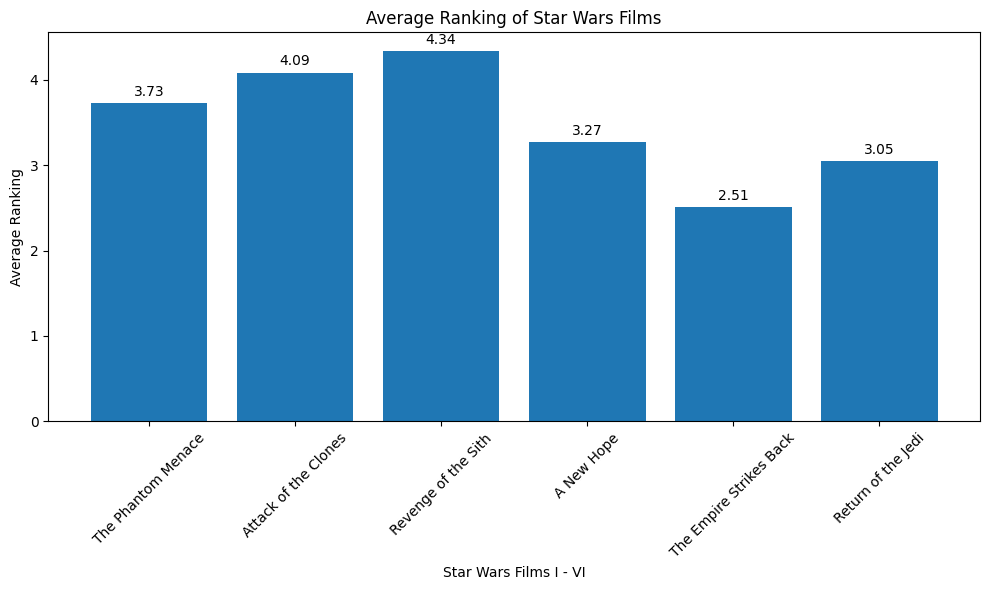

In [603]:
film_names = [
    "The Phantom Menace",
    "Attack of the Clones",
    "Revenge of the Sith",
    "A New Hope",
    "The Empire Strikes Back",
    "Return of the Jedi"
]

plt.figure(figsize=(10, 6))
plt.title('Average Ranking of Star Wars Films')
bars = plt.bar(ranking_columns, mean)
plt.xlabel('Star Wars Films I - VI')
plt.ylabel('Average Ranking')
plt.xticks(range(len(film_names)), film_names, rotation=45)

# Easiest way: use bar_label (matplotlib >= 3.4)
plt.bar_label(bars, fmt='%.2f', padding=3)

plt.tight_layout()
plt.show()


---

**Conclusion:**

Based on the average rankings, "The Empire Strikes Back" stands out as the most popular Star Wars movie among survey respondents, receiving the lowest (best) average score. "Return of the Jedi" and "A New Hope" also performed well, while "Revenge of the Sith" received the highest (least favorable) average ranking. This analysis gives us a clear view of fan preferences across the original and prequel trilogies.

---

### 👁️‍🗨️ Finding the Most Viewed Movie

Earlier in this project, we **cleaned up** the "seen" columns and converted their values to the **boolean type**.
When we call methods like **sum()** or **mean()**, they treat booleans like **integers**: **True is counted as 1 and False as 0.**
This means we can figure out how many people have seen each movie just by taking the sum of the column—even though it contains boolean values.

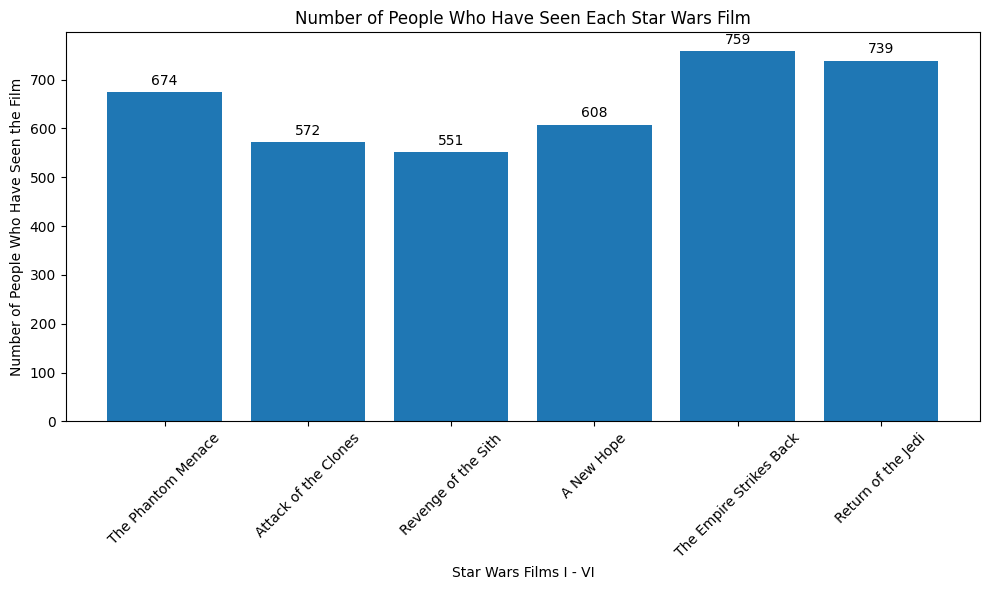

In [604]:
# calculate the sum of the seen films
sum = df[df.columns[3:9]].sum()



# plot the sum of the seen films
plt.figure(figsize=(10, 6))
plt.title('Number of People Who Have Seen Each Star Wars Film')
bars = plt.bar(df.columns[3:9], sum)
plt.xlabel('Star Wars Films I - VI')
plt.ylabel('Number of People Who Have Seen the Film')
plt.bar_label(bars, fmt='%d', padding=3)
plt.xticks(range(len(film_names)), film_names, rotation=45)
plt.tight_layout()
plt.show()

From the table above, it is clear that **The Empire Strikes Back** is the most seen Star Wars film, closely followed by **Return of the Jedi**. In third place is **The Phantom Menace**, with **A New Hope** coming next. The least viewed films are **Attack of the Clones** and **Revenge of the Sith**.

Overall, this is consistent with the **favorite movie ranking**—however, there is a slight difference: in the favorite ranking, **A New Hope** is third and **The Phantom Menace** is fourth, while in the most watched ranking, these two are reversed. This may be because **The Phantom Menace** was the first movie released in the prequel trilogy, attracting more viewers out of curiosity or nostalgia.

### 🧑‍🤝‍🧑 Exploring the Data by Binary Segments

We know which movies the survey population as a whole has ranked the highest. Now let's examine how certain segments of the survery population responded. There are several columns that segment our data into two groups. 

- Do you consider yourself to be a fan of the star wars film franchise? - True of False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female

We can split a DataFrame into two groups based on a binary column by creating two subsets of that column. For example, we can split on the gender column:

In [605]:
males = df[df["Gender"] == "Male"]
females = df[df["Gender"] == "Female"]

### 🧑‍🚀 Binary Segment Analysis: Star Wars Fans vs. Non-Fans

We will split the data based on whether respondents consider themselves fans of the Star Wars film franchise. For each group, we'll analyze:
- The most viewed movie
- The highest-ranked movie

Finally, we'll compare the results to see how preferences differ between fans and non-fans.

In [606]:
# split the data into fans and non-fans of the Star Wars franchise
fans = df[df["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
non_fans = df[df["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

print(f"Number of fans: {len(fans)}")
print(f"Number of non-fans: {len(non_fans)}")

Number of fans: 552
Number of non-fans: 284


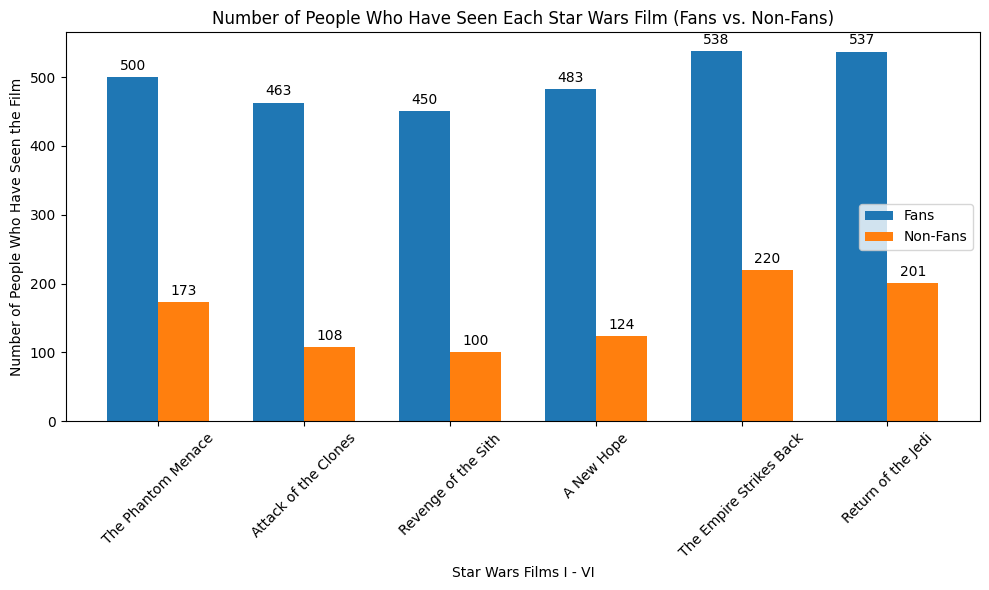

In [607]:
# most viewed movie for fans and non-fans
seen_columns = ["Seen_1", "Seen_2", "Seen_3", "Seen_4", "Seen_5", "Seen_6"]

fan_views = fans[seen_columns].sum()
nonfan_views = non_fans[seen_columns].sum()

plt.figure(figsize=(10, 6))
plt.title('Number of People Who Have Seen Each Star Wars Film (Fans vs. Non-Fans)')
bar_width = 0.35
x = np.arange(len(fan_views))

bars1 = plt.bar(x - bar_width/2, fan_views, bar_width, label='Fans')
bars2 = plt.bar(x + bar_width/2, nonfan_views, bar_width, label='Non-Fans')

plt.xlabel('Star Wars Films I - VI')
plt.ylabel('Number of People Who Have Seen the Film')
plt.xticks(x, film_names, rotation=45)
plt.bar_label(bars1, fmt='%d', padding=3)
plt.bar_label(bars2, fmt='%d', padding=3)
plt.legend()
plt.tight_layout()
plt.show()

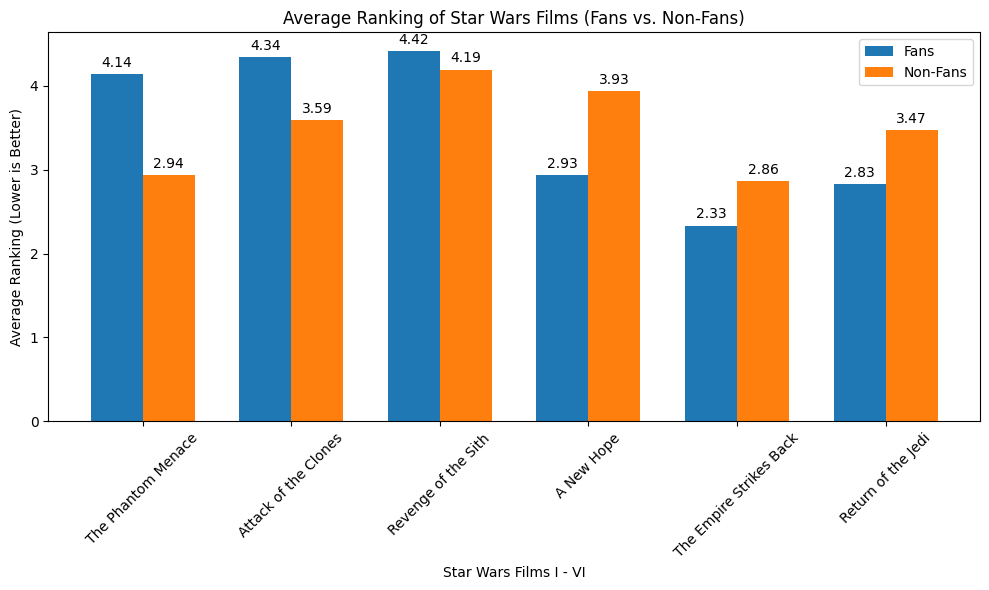

In [608]:
# highest-ranked movie for fans and non-fans
fan_means = fans[ranking_columns].mean()
nonfan_means = non_fans[ranking_columns].mean()

plt.figure(figsize=(10, 6))
plt.title('Average Ranking of Star Wars Films (Fans vs. Non-Fans)')
bar_width = 0.35
x = np.arange(len(fan_means))

bars1 = plt.bar(x - bar_width/2, fan_means, bar_width, label='Fans')
bars2 = plt.bar(x + bar_width/2, nonfan_means, bar_width, label='Non-Fans')

plt.xlabel('Star Wars Films I - VI')
plt.ylabel('Average Ranking (Lower is Better)')
plt.xticks(x, film_names, rotation=45)
plt.bar_label(bars1, fmt='%.2f', padding=3)
plt.bar_label(bars2, fmt='%.2f', padding=3)
plt.legend()
plt.tight_layout()
plt.show()

---

### 🏁 Conclusion: Fans vs. Non-Fans

- **Viewing Habits:** Star Wars fans are far more likely to have seen every film in the saga, while non-fans tend to drop off after the original trilogy. For both groups, "The Empire Strikes Back" and "Return of the Jedi" are the most widely watched, but the difference between films is much more dramatic among non-fans.

- **Favorite Movies:** Fans overwhelmingly select "The Empire Strikes Back" as their favorite, with consistently stronger (lower) average rankings across all movies. Non-fans show less pronounced preferences and generally rate the films less favorably, but still gravitate toward the original trilogy.

**Takeaways:**
- Being a fan of the franchise has a clear impact on both how many movies someone has seen and how much they enjoy them.
- Fans not only watch more, but also have more defined and positive opinions about their favorites.
- Even among non-fans, the original trilogy stands out as the most appreciated part of the series.

---